In [1]:
#class imbalance >> when one class has higher percentage
#handle:
#upsampling
#downsampling 
#SMOTE

In [3]:
import pandas as pd
import numpy as np

np.random.seed(1) #for reproducibility of result

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples*class_0_ratio)
no_class_1 = 100

In [9]:
no_class_0,no_class_1

(900, 100)

In [19]:
# standard deviation >> most of the value (68%) is in range -1 to 1 if mean is 0 
class_0={"f1":np.random.normal(0,1,no_class_0),# mean 0 standard deviation 1
"f2":np.random.normal(0,1,no_class_0),
        "target":[0]*no_class_0}
class_0=pd.DataFrame(class_0)
class_0

,f1,f2,target
0,-0.453503,-0.098819,0
1,-0.820905,-0.270149,0
2,0.940219,1.745068,0
3,-1.411293,-0.180558,0
4,0.884148,-0.202378,0
...,...,...,...
895,-1.140488,0.747622,0
896,0.501016,0.943634,0
897,0.225767,-0.425562,0
898,-1.089087,0.805778,0


In [25]:
class_1={"f1":np.random.normal(3,1,no_class_1),  # mean 3 standard deviation 1 
"f2":np.random.normal(3,1,no_class_1),
        "target":[1]*no_class_1}
class_1=pd.DataFrame(class_1)
class_1

,f1,f2,target
0,3.135075,2.075245,1
1,3.968622,4.128890,1
2,2.905683,1.871209,1
3,2.052372,2.275262,1
4,2.765708,3.623571,1
...,...,...,...
95,4.604546,2.418320,1
96,3.566613,2.991877,1
97,2.224012,2.422294,1
98,4.084889,4.634844,1


In [29]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [33]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [51]:
# upsampling 
df_minor=df[df["target"]==1]
df_major=df[df["target"]==0]

In [57]:
#replace >> if replace is true, it means data point can be repeated
from sklearn.utils import resample
df_minority_upsampled = resample(df_minor, replace = True, n_samples= len(df_major), random_state = 1)

In [61]:
df_minority_upsampled

,f1,f2,target
937,1.972435,2.189412,1
912,3.082419,3.117620,1
972,1.965749,2.604094,1
909,1.695734,3.693304,1
975,4.772187,3.823682,1
...,...,...,...
936,4.553357,1.521747,1
998,4.084889,4.634844,1
901,3.968622,4.128890,1
932,2.248826,2.108890,1


In [65]:
df_upsampled=pd.concat([df_major,df_minority_upsampled])


In [67]:
df_upsampled

,f1,f2,target
0,-0.453503,-0.098819,0
1,-0.820905,-0.270149,0
2,0.940219,1.745068,0
3,-1.411293,-0.180558,0
4,0.884148,-0.202378,0
...,...,...,...
936,4.553357,1.521747,1
998,4.084889,4.634844,1
901,3.968622,4.128890,1
932,2.248826,2.108890,1


In [77]:
# down scaling
df_major_downsampled=resample(df_major,replace=False,n_samples= len(df_minor), random_state = 1)

In [81]:
df_downscaled=pd.concat([df_major_downsampled,df_minor])
df_downscaled.target.value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [101]:
# SMOTE >> synthetc minority oversampling technique
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_redundant=0, n_features = 2, n_clusters_per_class=1, weights = [0.90])

In [103]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([df1, df2], axis = 1)

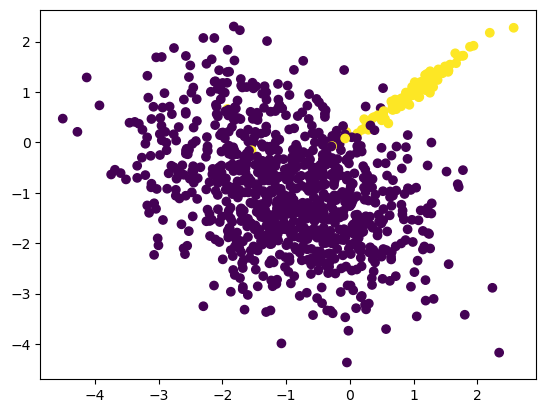

In [105]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [111]:
final_df.shape

(1000, 3)

In [113]:
#!pip  install imblearn
from imblearn.over_sampling import SMOTE
oversample  = SMOTE()

In [115]:
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [117]:
X.shape

(1798, 2)

In [119]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
smote_df = pd.concat([df1, df2], axis = 1)

In [121]:
smote_df


,f1,f2,target
0,-0.884204,-1.249210,0
1,0.719805,-2.653599,0
2,-1.193678,-1.719546,0
3,-1.712259,1.257918,0
4,0.003374,-0.253817,0
...,...,...,...
1793,0.494073,0.500204,1
1794,-1.042122,-0.122777,1
1795,1.025409,0.959744,1
1796,1.692102,1.674406,1


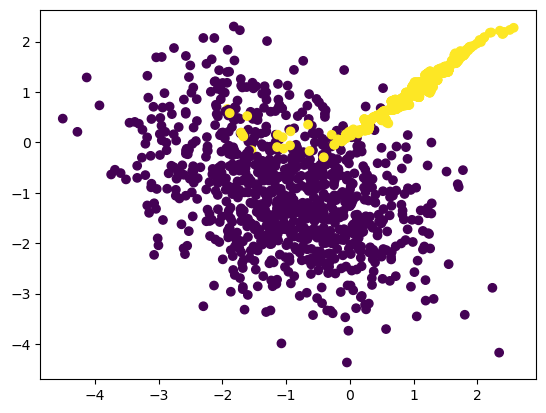

In [123]:
plt.scatter(smote_df['f1'], smote_df['f2'], c = smote_df['target'])